<a href="https://colab.research.google.com/github/vedantichavan/Mini-Tasks-/blob/main/TimAlpha_VideoRec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
HEADERS = {
    "Flic-Token": "flic_6e2d8d25dc29a4ddd382c2383a903cf4a688d1a117f6eb43b35a1e7fadbb84b8"
}
BASE_URLS = [
    "https://api.socialverseapp.com/posts/view?page=1&page_size=1000&resonance_algorithm=resonance_algorithm_cjsvervb7dbhss8bdrj89s44jfjdbsjd0xnjkbvuire8zcjwerui3njfbvsujc5if",
    "https://api.socialverseapp.com/posts/like?page=1&page_size=1000&resonance_algorithm=resonance_algorithm_cjsvervb7dbhss8bdrj89s44jfjdbsjd0xnjkbvuire8zcjwerui3njfbvsujc5if",
    "https://api.socialverseapp.com/posts/inspire?page=1&page_size=1000&resonance_algorithm=resonance_algorithm_cjsvervb7dbhss8bdrj89s44jfjdbsjd0xnjkbvuire8zcjwerui3njfbvsujc5if",
    "https://api.socialverseapp.com/posts/rating?page=1&page_size=1000&resonance_algorithm=resonance_algorithm_cjsvervb7dbhss8bdrj89s44jfjdbsjd0xnjkbvuire8zcjwerui3njfbvsujc5if",
    "https://api.socialverseapp.com/posts/summary/get?page=1&page_size=1000",
    "https://api.socialverseapp.com/users/get_all?page=1&page_size=1000"
]

In [ ]:
def fetch_data(url):
    try:
        response = requests.get(url, headers=HEADERS)
        if response.status_code == 200:
            print(f"Response from {url}: {response.json()}")  # Print the response
            return response.json()
        else:
            print(f"Failed to fetch data from {url}. Status Code: {response.status_code}")
            return None
    except Exception as e:
        print(f"Error: {e}")
        return None


# Load Data from APIs
def load_data():
    data = {}
    for idx, url in enumerate(BASE_URLS):
        api_name = f"api_{idx}"
        data[api_name] = fetch_data(url)
    return data



In [ ]:
# Fetch and Process Data
data = load_data()

# Convert API Data into DataFrames (Assuming JSON is structured appropriately)
posts_view = pd.DataFrame(data["api_0"].get("posts", []))  # Use "posts" key instead of "data"
posts_like = pd.DataFrame(data["api_1"].get("posts", []))  # Adjust this based on the API structure
posts_inspire = pd.DataFrame(data["api_2"].get("posts", []))
posts_rating = pd.DataFrame(data["api_3"].get("posts", []))
users = pd.DataFrame(data["api_5"].get("users", []))       # Use "users" key for user data


Response from https://api.socialverseapp.com/posts/view?page=1&page_size=1000&resonance_algorithm=resonance_algorithm_cjsvervb7dbhss8bdrj89s44jfjdbsjd0xnjkbvuire8zcjwerui3njfbvsujc5if: {'status': 'success', 'message': 'Viewed posts fetched successfully', 'page': 1, 'page_size': 1000, 'max_page_size': 1000, 'posts': [{'id': 18, 'post_id': 631, 'user_id': 114, 'viewed_at': '2024-01-10 07:20:55'}, {'id': 19, 'post_id': 626, 'user_id': 114, 'viewed_at': '2024-01-10 07:21:18'}, {'id': 20, 'post_id': 571, 'user_id': 114, 'viewed_at': '2024-01-10 07:22:02'}, {'id': 22, 'post_id': 558, 'user_id': 116, 'viewed_at': '2024-01-10 12:33:47'}, {'id': 23, 'post_id': 551, 'user_id': 116, 'viewed_at': '2024-01-10 12:33:55'}, {'id': 24, 'post_id': 560, 'user_id': 116, 'viewed_at': '2024-01-10 12:34:06'}, {'id': 25, 'post_id': 588, 'user_id': 116, 'viewed_at': '2024-01-10 12:34:47'}, {'id': 32, 'post_id': 473, 'user_id': 44, 'viewed_at': '2024-01-11 18:32:10'}, {'id': 34, 'post_id': 633, 'user_id': 44, '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Response from https://api.socialverseapp.com/users/get_all?page=1&page_size=1000: {'status': 'success', 'message': 'Users fetched successfully', 'page': 1, 'max_page_size': 1000, 'page_size': 1000, 'users': [{'id': 1, 'first_name': 'Michael', 'last_name': 'Dadzie', 'username': 'afrobeezy', 'email': 'dadziemikke@outlook.com', 'role': 'A', 'profile_url': 'https://assets.socialverseapp.com/profile/afrobeezy1704186478image_cropper_B57BCBB5-40B6-4B0A-8710-940B7292DC11-2518-00000201B79852C3.jpg.png', 'bio': 'Digitial Nomad | iOS Developer', 'website_url': 'https://www.github.com/michaeldadzie', 'instagram-url': 'https://www.instagram.com/michaeldadziie', 'youtube_url': '', 'tictok_url': '', 'isVerified': False, 'referral_code': 'afrob_dd42', 'has_wallet': True, 'last_login': '2024-12-07 12:42:06', 'share_count': 0, 'post_count': 57, 'following_count': 8, 'follower_count': 20, 'is_verified': False, 'is_online': True, 'latitude': '', 'longitude': ''}, {'id': 2, 'first_name': 'John', 'last_name

In [ ]:
print("Posts View DataFrame:\n", posts_view.head())
print("Posts Like DataFrame:\n", posts_like.head())
print("Posts Inspire DataFrame:\n", posts_inspire.head())
print("Posts Rating DataFrame:\n", posts_rating.head())
print("Users DataFrame:\n", users.head())


Posts View DataFrame:
    id  post_id  user_id            viewed_at
0  18      631      114  2024-01-10 07:20:55
1  19      626      114  2024-01-10 07:21:18
2  20      571      114  2024-01-10 07:22:02
3  22      558      116  2024-01-10 12:33:47
4  23      551      116  2024-01-10 12:33:55
Posts Like DataFrame:
    id  post_id  user_id             liked_at
0   2       26        9  2023-10-24 19:28:41
1   3       33        9  2023-10-26 09:08:32
2   5       36        1  2023-10-28 09:08:35
3   7       36       16  2023-10-28 09:15:57
4   9       52        9  2023-10-30 15:48:46
Posts Inspire DataFrame:
    id  post_id  user_id          inspired_at
0   1      588        1  2023-12-31 09:06:27
1   2      152        1  2023-12-31 09:07:32
2   3      415        1  2023-12-31 09:10:09
3   4      558        1  2023-12-31 09:11:23
4   5      549        1  2023-12-31 09:11:28
Posts Rating DataFrame:
    id  post_id  user_id  rating_percent             rated_at
0   1      516        1         

In [ ]:
posts_rating

,id,post_id,user_id,rating_percent,rated_at
0,1,516,1,64,2024-01-11 12:45:41
1,2,160,1,62,2024-01-11 12:47:15
2,3,19,1,20,2024-01-11 12:47:28
3,4,148,1,100,2024-01-11 12:49:35
4,5,513,1,63,2024-01-11 12:50:58
...,...,...,...,...,...
995,1036,142,487,20,2024-06-20 09:58:48
996,1037,516,487,19,2024-06-20 09:58:49
997,1038,150,487,19,2024-06-20 09:58:51
998,1039,779,487,17,2024-06-20 09:58:52


In [ ]:

from sklearn.decomposition import TruncatedSVD

# Example: Handling missing data
posts_view.fillna(method='ffill', inplace=True)
posts_like.fillna(method='ffill', inplace=True)
posts_inspire.fillna(method='ffill', inplace=True)
posts_rating.fillna(method='ffill', inplace=True)



In [ ]:
posts_rating

,id,post_id,user_id,rating_percent,rated_at
0,1,516,1,64,2024-01-11 12:45:41
1,2,160,1,62,2024-01-11 12:47:15
2,3,19,1,20,2024-01-11 12:47:28
3,4,148,1,100,2024-01-11 12:49:35
4,5,513,1,63,2024-01-11 12:50:58
...,...,...,...,...,...
995,1036,142,487,20,2024-06-20 09:58:48
996,1037,516,487,19,2024-06-20 09:58:49
997,1038,150,487,19,2024-06-20 09:58:51
998,1039,779,487,17,2024-06-20 09:58:52


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

C:\Users\VEDANTI\AppData\Local\Temp\ipykernel_2676\3244085554.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interaction_scores[['view_norm', 'like_norm', 'rating_norm']] = scaler.fit_transform(
C:\Users\VEDANTI\AppData\Local\Temp\ipykernel_2676\3244085554.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interaction_scores[['view_norm', 'like_norm', 'rating_norm']] = scaler.fit_transform(
C:\Users\VEDANTI\AppData\Local\Temp\ipykernel_2676\3244085554.py:67: SettingWithCopyWarning: 
A value is tryin

Content-Based Recommendations for User 1
Recommended Post IDs: [1066, 1063, 415, 1053, 1057]
Mean Absolute Error (MAE): 29.909090909090907
Root Mean Square Error (RMSE): 29.909090909090907


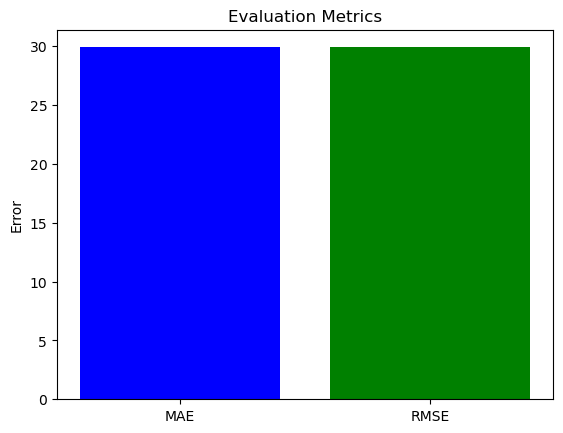

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt


class ContentBasedRecommender:
    def __init__(self, posts_view_df, posts_like_df, posts_rating_df):
        """
        Initialize the recommender with interaction data

        Parameters:
        - posts_view_df: DataFrame of post views
        - posts_like_df: DataFrame of post likes
        - posts_rating_df: DataFrame of post ratings
        """
        self.posts_view_df = posts_view_df
        self.posts_like_df = posts_like_df
        self.posts_rating_df = posts_rating_df

        # Preprocessing
        self.prepare_data()

    def prepare_data(self):
        """
        Preprocess and merge interaction data
        """
        # Combine interaction metrics
        self.views_count = self.posts_view_df.groupby('post_id').size().reset_index(name='view_count')
        self.likes_count = self.posts_like_df.groupby('post_id').size().reset_index(name='like_count')
        self.ratings_avg = self.posts_rating_df.groupby('post_id')['rating_percent'].mean().reset_index(name='avg_rating')

        # Merge data
        self.post_interactions = self.views_count.merge(self.likes_count, on='post_id', how='outer')
        self.post_interactions = self.post_interactions.merge(self.ratings_avg, on='post_id', how='outer')
        self.post_interactions.fillna(0, inplace=True)

    def recommend(self, user_id, top_n=5):
        """
        Generate content-based recommendations for a specific user

        Parameters:
        - user_id: ID of the user to generate recommendations for
        - top_n: Number of recommendations to return

        Returns:
        - List of recommended post IDs
        """
        # Get posts viewed or liked by the user
        user_posts = pd.concat([
            self.posts_view_df[self.posts_view_df['user_id'] == user_id]['post_id'],
            self.posts_like_df[self.posts_like_df['user_id'] == user_id]['post_id']
        ]).unique()

        # If no interaction history, recommend popular posts
        if len(user_posts) == 0:
            return self.get_popular_posts(top_n)

        # Calculate interaction scores
        interaction_scores = self.post_interactions[
            ~self.post_interactions['post_id'].isin(user_posts)  # Exclude already interacted posts
        ]

        # Normalize metrics
        scaler = MinMaxScaler()
        interaction_scores[['view_norm', 'like_norm', 'rating_norm']] = scaler.fit_transform(
            interaction_scores[['view_count', 'like_count', 'avg_rating']]
        )

        # Weighted score
        interaction_scores['interaction_score'] = (
            0.4 * interaction_scores['view_norm'] +
            0.4 * interaction_scores['like_norm'] +
            0.2 * interaction_scores['rating_norm']
        )

        # Return top recommendations
        recommendations = interaction_scores.nlargest(top_n, 'interaction_score')['post_id'].tolist()
        return recommendations

    def evaluate_recommendations(self, user_id):
        """
        Evaluate recommendation quality using MAE and RMSE.

        Parameters:
        - user_id: User ID to evaluate recommendations for.

        Returns:
        - Dictionary of evaluation metrics.
        """
        # Get user's actual ratings
        user_actual_ratings = self.posts_rating_df[self.posts_rating_df['user_id'] == user_id]

        # Generate recommendations
        recommended_posts = self.recommend(user_id)

        # Filter actual ratings for recommended posts
        common_posts = user_actual_ratings[user_actual_ratings['post_id'].isin(recommended_posts)]
        actual_ratings = common_posts['rating_percent'].tolist()

        # Match predicted ratings for these posts
        predicted_ratings = [
            self.post_interactions[self.post_interactions['post_id'] == post_id]['avg_rating'].values[0]
            for post_id in common_posts['post_id']
        ]

        if len(actual_ratings) == 0 or len(predicted_ratings) == 0:
            return {
                'MAE': None,
                'RMSE': None,
                'Recommended Posts': recommended_posts
            }

        # Calculate evaluation metrics
        mae = mean_absolute_error(actual_ratings, predicted_ratings)
        rmse = sqrt(mean_squared_error(actual_ratings, predicted_ratings))

        return {
            'MAE': mae,
            'RMSE': rmse,
            'Recommended Posts': recommended_posts
        }

    def get_popular_posts(self, top_n):
        """
        Recommend popular posts based on interaction score

        Parameters:
        - top_n: Number of posts to recommend

        Returns:
        - List of popular post IDs
        """
        popular_posts = self.post_interactions.nlargest(top_n, 'view_count')['post_id'].tolist()
        return popular_posts


# Instantiate the recommender
recommender = ContentBasedRecommender(posts_view, posts_like, posts_rating)

# Example: Test recommendations for a user
test_user_id = 1
results = recommender.evaluate_recommendations(test_user_id)

# Extract results
mae = results['MAE']
rmse = results['RMSE']
recommendations = results['Recommended Posts']

# Display Results
print("Content-Based Recommendations for User", test_user_id)
print("Recommended Post IDs:", recommendations)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)

# Plotting Results
if mae is not None and rmse is not None:
    metrics = {'MAE': mae, 'RMSE': rmse}
    plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green'])
    plt.title('Evaluation Metrics')
    plt.ylabel('Error')
    plt.show()
else:
    print("Evaluation metrics could not be computed due to insufficient data.")
